<a href="https://colab.research.google.com/github/Spokai3/PhanTichDuLieuVaHocSau/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Botplox***

In [ ]:
import pandas as pd
datatitanic = pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv")

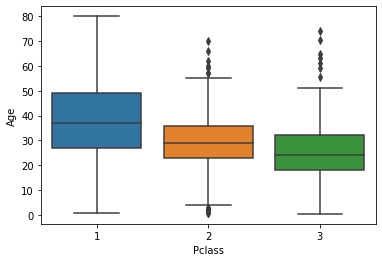

In [ ]:
import seaborn as sns
sns.boxplot(y='Age', x='Pclass', data = datatitanic)

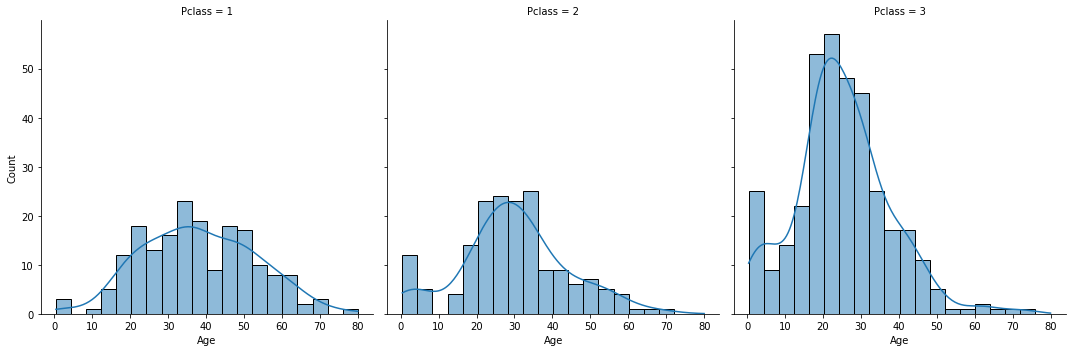

In [ ]:
sns.displot(datatitanic, x="Age", col="Pclass", kde=True)

***Plotting with categorical data***

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


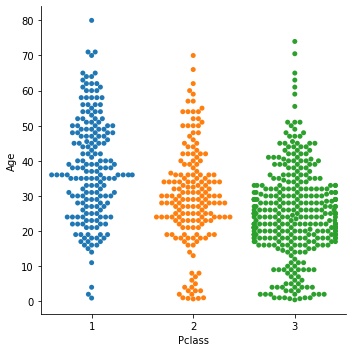

In [ ]:
sns.catplot(x="Pclass", y="Age", kind="swarm", data=datatitanic)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


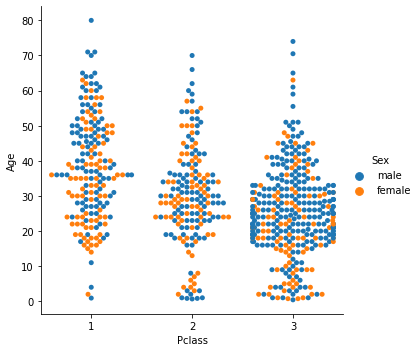

In [ ]:
sns.catplot(x="Pclass", y="Age", hue="Sex", kind="swarm", data=datatitanic)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


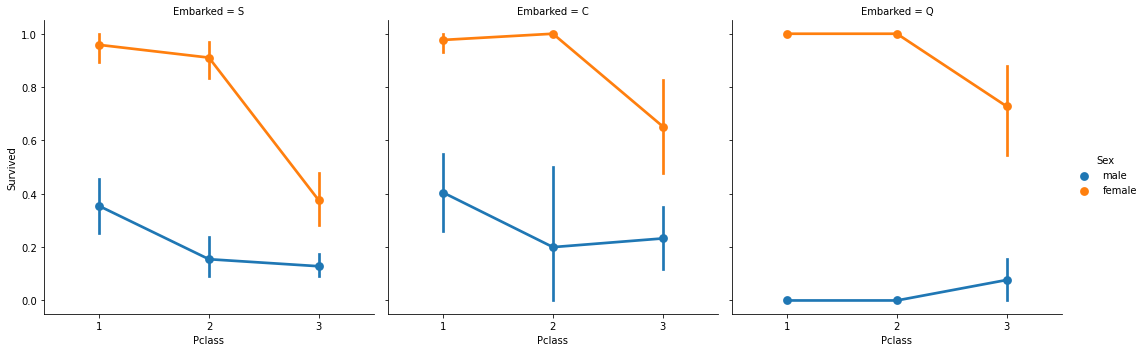

In [ ]:
sns.factorplot(x="Pclass", y='Survived', hue='Sex', col='Embarked', data=datatitanic)

***Bài tập***

1.Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.


In [ ]:
def load_data():
  return pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv")

In [ ]:
load_data().head(10)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]

2.Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

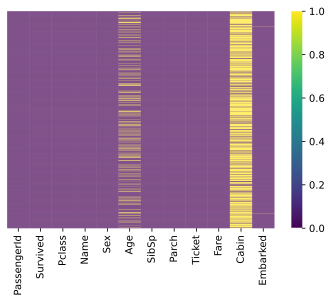

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(load_data().isna(),
            yticklabels = False,
            cbar=True,
            cmap= 'viridis')

3.Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName.

In [29]:
ldt = load_data()
ldt[['firstName','secondName']]=ldt['Name'].str.split(",",expand = True)
ldt=ldt.drop('Name', axis = 1)
ldt.head(10)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry
5            6  ...                                    Mr. James
6            7  ...                                Mr. Timothy J
7            8  ...                        Master. Gosta Leonard
8            9  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10  ...                  Mrs. Nicholas (Adele Achem)

[10 rows x 13 columns]

In [36]:
ldt.loc[ldt['Sex'] == 'male', 'Sex'] = 'M'
ldt.loc[ldt['Sex'] == 'female', 'Sex'] = 'F'
ldt.head(10)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry
5            6  ...                                    Mr. James
6            7  ...                                Mr. Timothy J
7            8  ...                        Master. Gosta Leonard
8            9  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10  ...                  Mrs. Nicholas (Adele Achem)

[10 rows x 13 columns]

2.Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau


Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. b. Tiến hành thay thế giá trị Age bị thiếu.


Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

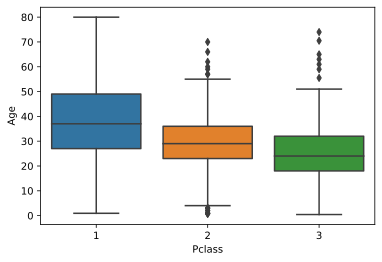

In [37]:
sns.boxplot(y = 'Age', x='Pclass', data=ldt)

In [39]:
ldt['Age'].fillna(ldt['Age'].mean(), inplace = True)
ldt.head(10)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry
5            6  ...                                    Mr. James
6            7  ...                                Mr. Timothy J
7            8  ...                        Master. Gosta Leonard
8            9  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10  ...                  Mrs. Nicholas (Adele Achem)

[10 rows x 13 columns]

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(ldt.isna(),
            yticklabels = False,
            cbar = True,
            cmap = 'viridis')